# Assignment 2 
# Name: Sha Liu

## First, consider c.elegans as a directed network.

### Read the text file and create a network

In [1]:
import networkx as nx
%matplotlib inline

In [2]:
D = nx.read_weighted_edgelist('data/celegansneural.edges.txt',create_using=nx.DiGraph)

### 1. How many nodes and links are in the network?

In [3]:
D.number_of_nodes()

297

### 2. What is the density of the network?

In [4]:
print("The density of network D is", nx.density(D))

The density of network D is 0.026674401674401674


### 3. Please show the node with the largest in-degree, and the node with the largest out-degree.

In [5]:
def max_in_degree(D):
  nodes = dict(D.in_degree(D.nodes()))
  return max(nodes.items(), key=lambda x: x[1])

print("The node with the largest in-degree of network D is ", max_in_degree(D))

def max_out_degree(D):
  nodes = dict(D.out_degree(D.nodes()))
  return max(nodes.items(), key=lambda x: x[1])

print("The node with the largest out-degree of network D is ", max_out_degree(D))

The node with the largest in-degree of network D is  ('45', 134)
The node with the largest out-degree of network D is  ('3', 39)


### 4. Please show the node with the largest in-strength, and the one with the largest out-strength.

In [6]:
def retreive_max_in_edge(D, n):
    """
    given node n, retrieve all of its in-comming edges and find the edge with max in-strength.
    return a tuple of the node n and its max in-strength
    """
    in_edge = D.in_edges(n, data=True)
    max_in_edge = ('0','0',{'weight':0})
    if len(in_edge)>0:
        try:
            max_in_edge = max(in_edge, key=lambda x: x[2]['weight'])
        except:
            pass
    return (n, max_in_edge[2]['weight'])

def retreive_max_in_strength_node(D):
    """
    given graph D, retrieve all of its node and find the node with largest max in-strength.
    return the node and its max in-strength
    """
    max_in_strength_node = ('0',0)
    nodes = []
    for n in D.nodes():
        nodes.append(retreive_max_in_edge(D, n))
    if len(nodes)>0:
        max_in_strength_node = max(nodes, key=lambda x: x[1])
    return max_in_strength_node

In [7]:
def retreive_max_out_edge(D, n):
    out_edge = D.out_edges(n, data=True)
    max_out_edge = ('0','0',{'weight':0})
    if len(out_edge)>0:
        try:
            max_out_edge = max(out_edge, key=lambda x: x[2]['weight'])
        except:
            pass
    return (n, max_out_edge[2]['weight'])

def retreive_max_out_strength_node(D):
    max_out_strength_node = ('0',0)
    nodes = []
    for n in D.nodes():
        nodes.append(retreive_max_out_edge(D, n))
    if len(nodes)>0:
        max_out_strength_node = max(nodes, key=lambda x: x[1])
    return max_out_strength_node

In [8]:
print("The largest in-strength node and weight", retreive_max_in_strength_node(D))
print("The largest out-strength node and weight", retreive_max_out_strength_node(D))

The largest in-strength node and weight ('3', 70.0)
The largest out-strength node and weight ('119', 70.0)


### 5. Please calculate the average in-degree and out-degree of the network D. 

In [9]:
import numpy as np
def avg_in_degree(D):
  nodes = dict(D.in_degree(D.nodes()))
  return np.mean(list(nodes.values()))

print("The node with the average in-degree of network D is ", avg_in_degree(D))

def avg_out_degree(D):
  nodes = dict(D.out_degree(D.nodes()))
  return np.mean(list(nodes.values()))

print("The node with the average out-degree of network D is ", avg_out_degree(D))

The node with the average in-degree of network D is  7.895622895622895
The node with the average out-degree of network D is  7.895622895622895


### 6. Draw the network

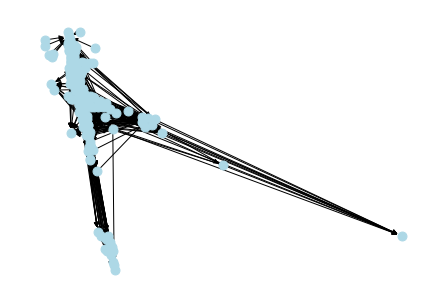

In [10]:
nx.draw_spring(D, node_size=80, node_color='lightblue', with_labels=False)

### 7. Any nodes with zero in-degree? How many?

In [11]:
def in_degree_zero(D):
    in_degree_zero = []
    for n, degree in D.in_degree():
        if degree == 0:
            in_degree_zero.append(n)
    return in_degree_zero
    
print("A list of nodes with zero in-degree" ,in_degree_zero(D))
print("Total number of nodes with zero in-degree =", len(in_degree_zero(D)))

A list of nodes with zero in-degree ['135', '55', '262', '58', '231', '252', '279', '281', '282', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '144', '260', '243', '244', '296', '297', '261']
Total number of nodes with zero in-degree = 27


### 8. Any nodes with zero out-degree? How many?

In [12]:
def out_degree_zero(D):
    out_degree_zero = []
    for n, degree in D.out_degree():
        if degree == 0:
            out_degree_zero.append(n)
    return out_degree_zero
    
print("A list of nodes with zero out-degree" ,out_degree_zero(D))
print("Total number of nodes with zero out-degree =", len(out_degree_zero(D)))

A list of nodes with zero out-degree ['40', '45', '191']
Total number of nodes with zero out-degree = 3


### 9. Which pair of nodes have the largest number of common predecessors?

In [13]:
max_pre = 0
max_pre_node_pairs = 0
for u, v in D.edges:
    u_set = set(D.predecessors(u))
    v_set = set(D.predecessors(v))
    if len(u_set & v_set) > max_pre:
        max_pre = len(u_set & v_set)
        max_pre_node_pairs = (u, v)
        
print("The largest number of common predecessors is" ,max_pre)
print("The node pair is", max_pre_node_pairs)

The largest number of common predecessors is 21
The node pair is ('3', '119')


### 10. Which pair of nodes have the largest number of common successors?

In [14]:
max_suc = 0
max_suc_node_pairs = 0
for u, v in D.edges:
    u_set = set(D.successors(u))
    v_set = set(D.successors(v))
    if len(u_set & v_set) > max_suc:
        max_suc = len(u_set & v_set)
        max_suc_node_pairs = (u, v)
        
print("The largest number of common successors is" ,max_suc)
print("The node pair is", max_suc_node_pairs)

The largest number of common successors is 29
The node pair is ('3', '13')


## Read c.elegans as an undirected network.

In [15]:
G = nx.read_weighted_edgelist('data/celegansneural.edges.txt',create_using=nx.Graph)

### 1. What's the average path length?

In [16]:
nx.average_shortest_path_length(G)

2.455318955318955

### 2. What's the diameter?

In [17]:
nx.diameter(G)

5

### 3. Which node has the largest clustering coefficient?

In [18]:
def max_clustering_coe(G):
    return max(nx.clustering(G).items(), key=lambda x: x[1])

print("The largest clustering coefficient node and its coefficient is", max_clustering_coe(G))

The largest clustering coefficient node and its coefficient is ('252', 1.0)


### 4. What's the average clustering coefficient?

In [19]:
nx.average_clustering(G)

0.2923632978321901